In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def KMeans(k, iteraciones, data):
    muestra, caracteristicas = data.shape

    centroides = data[np.random.choice(muestra, k, replace=False)]
    for _ in range (iteraciones):
        clusters = np.zeros(muestra)
        for i, punto in enumerate(data):
            clusters[i] = np.argmin(np.linalg.norm(punto - centroides, axis=1))

        centroides_nuevos = np.zeros((k, caracteristicas))
        for i in range (k):
            centroides_nuevos[i] = np.mean(data[clusters == i], axis=0)

        if np.allclose(centroides, centroides_nuevos):
            break

        centroides = centroides_nuevos
    return centroides, clusters

In [3]:
def distanciaEuclidaneaCuadrada(punto1, punto2):
    return np.sum((punto1 - punto2) ** 2)

def KMeans2(D, k, epsilon):
    muestra, caracteristicas = np.shape(D)

    centroides = D[np.random.choice(muestra, k, replace=False)]

    while True:
        clusters = np.zeros(muestra)
        for i, punto in enumerate(D):
            clusters[i] = np.argmin([distanciaEuclidaneaCuadrada(punto, centroide) for centroide in centroides])

        centroides_nuevos = np.zeros((k, caracteristicas))
        for i in range(k):
            centroides_nuevos[i] = np.mean(D[clusters == i], axis=0)

        if np.all(np.abs(centroides - centroides_nuevos) < epsilon):
            break

        centroides = centroides_nuevos

    return centroides, clusters

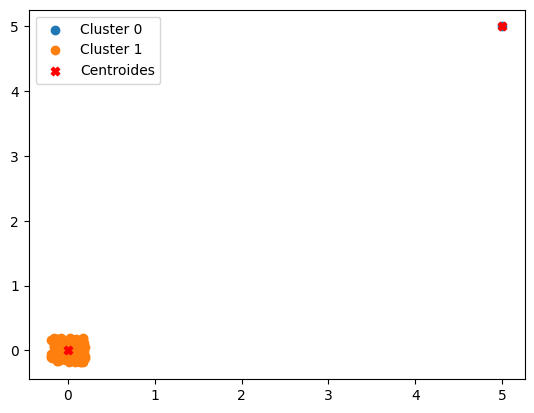

In [4]:
def dataset():
    A = np.random.uniform(low=-0.2, high=0.2, size=(100, 2))
    B = np.array([[5,5]])
    return np.concatenate((A, B))

data = dataset()
k = 2
iteraciones = 10

fig, ax = plt.subplots()
centroides, clusters = KMeans(k, iteraciones, data)

for _ in range(iteraciones):
    ax.clear()
    ax.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label='Cluster 0')
    ax.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label='Cluster 1')
    ax.scatter(centroides[:, 0], centroides[:, 1], marker = 'X', color='red', label='Centroides')
    ax.legend()
    plt.pause(1)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

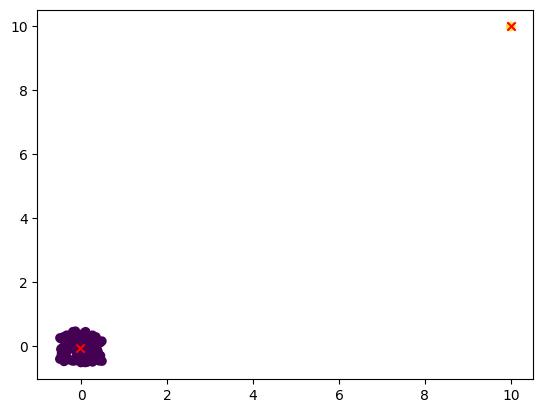

In [25]:
def dataset():
    A = np.random.uniform(low=-0.5, high=0.5, size=(100, 2))
    B = np.array([[10,10]])
    return np.concatenate((A, B))

centroides, clusters = KMeans2(dataset(), k=2, epsilon=0.1)

plt.scatter(dataset()[:, 0], dataset()[:, 1], c=clusters)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x')
plt.show